In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

# Importing Data
1. Randomly shuffle the dataset by taking a random seed of “42”. Create a testing set from the last 20%
rows of the dataframe (these must be the same for all the students). The remaining rows will be the 
training + validation set, with training : validation ratio of 80% : 20%. Determine 
A) number of rows in training, validation and test sets, along with the structure, datatypes and 
value counts of the dataframes.

In [45]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [52]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.178195e-15,3.037921e-16,-1.408014e-15,2.080863e-15,9.732347e-16,1.494376e-15,-6.081175e-16,1.149536e-16,-2.419779e-15,...,1.659605e-16,-3.428540e-16,2.479354e-16,4.466717e-15,5.130258e-16,1.689205e-15,-3.705117e-16,-1.217684e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [53]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 112582 to 124105
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21  

In [54]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)
df_temp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
112582,1.178598,0.165963,0.121668,1.092826,0.039454,-0.102678,0.035372,0.000913,0.106360,0.027809,...,-0.634804,-0.141463,0.071288,0.206156,-0.161400,-0.462839,0.643265,-0.218767,0.025268,0.016461
77687,-0.754196,0.816714,1.900594,-0.204846,0.258701,-0.183295,0.847090,-0.008486,-0.600570,-0.041639,...,-0.193989,0.177251,0.159257,0.665341,-0.367997,0.252736,0.403427,0.530817,0.080610,-0.116282
255500,-0.613051,0.984764,-0.090300,-0.795440,2.018146,-0.217026,1.562558,-0.253562,-1.155665,-0.717745,...,1.474175,0.145837,0.133917,0.465613,-0.851996,-1.294652,1.493782,0.198222,-0.020264,0.014614
38712,1.154826,0.166233,0.593458,0.502893,-0.315514,-0.307808,-0.093892,0.052094,-0.270624,0.050109,...,-0.267239,-0.099001,-0.160183,-0.460871,0.173390,0.225906,0.094777,0.093054,-0.014995,0.008507
111915,-0.252670,1.023347,1.304723,0.411112,0.303165,-0.424341,0.591484,-0.022438,-0.676465,-0.566863,...,0.243874,0.055060,-0.123666,-0.300036,0.074943,0.051479,-0.789975,0.115854,0.156781,0.172765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222120,-0.820758,0.473278,2.152934,0.026083,0.313706,-0.495389,0.178058,0.027774,-0.195454,-0.808051,...,0.871106,0.244449,-0.067924,-0.225821,-0.174347,-0.013946,0.242010,-0.303050,0.088240,0.091680
253959,-0.741098,0.025781,-0.522798,-2.240733,2.674515,3.550910,0.772410,0.913420,-0.525901,-1.013462,...,-0.778242,0.241527,-0.292249,-1.391242,0.516049,0.626237,-0.590380,-0.075383,0.016884,0.150534
22703,-0.868260,0.932589,0.571916,-0.107275,2.157593,3.934438,-0.238673,1.083028,-0.410057,0.297408,...,0.879255,0.504354,0.044927,0.189939,-0.336198,1.006837,0.568693,-0.082223,0.461912,0.222029
89180,-2.369632,-1.369303,1.249460,-0.399429,-0.404900,-0.890945,0.798712,-0.242890,0.737953,-0.544124,...,-0.411229,-1.039358,-0.302413,0.008779,0.856699,0.435040,0.273029,0.891153,-0.173388,0.105937


In [56]:
df=df.sample(frac=1,random_state=42)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
170152,120041.0,2.061939,0.069270,-1.795377,0.397030,0.422772,-0.802498,0.155374,-0.193662,0.599443,...,-0.374794,-1.031913,0.317331,0.362154,-0.263230,0.182172,-0.069364,-0.031272,13.99,0
89173,62462.0,1.397182,-0.913343,0.455876,-2.077275,-1.616702,-1.251872,-0.784894,-0.184645,0.538005,...,-0.212428,-0.044564,-0.036045,0.404393,0.399907,0.089112,0.041768,0.024243,15.21,0
53907,46209.0,-1.183003,-0.745315,1.748014,-1.850703,-1.628396,-0.385995,-0.914537,0.618872,-1.623605,...,-0.074904,0.217762,0.088554,0.600513,-0.014872,-0.255190,0.272692,0.064812,64.11,0
94032,64701.0,1.344237,-0.636912,0.167439,-0.880635,-0.725334,-0.189329,-0.694465,0.141171,-0.868162,...,0.051253,-0.037763,0.023515,-0.340854,0.301373,-0.303339,0.000094,-0.003166,15.50,0
258562,158708.0,1.747912,-0.662599,-1.018658,0.509570,-0.317361,-0.424421,-0.056373,-0.091790,0.538670,...,0.074896,0.032207,0.054116,-0.312508,-0.243235,0.212904,-0.069940,-0.043635,139.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162231,114948.0,-1.185746,-0.314481,1.175712,-3.086775,-0.937127,-0.098773,-0.395241,0.524620,-2.521438,...,-0.062146,0.025225,-0.227184,-0.481106,0.737622,-0.112099,0.137225,0.013963,78.00,0
164085,116440.0,2.034507,-0.114704,-1.932257,0.313285,0.581739,-0.779779,0.542356,-0.393208,0.303417,...,-0.027970,0.021806,0.029046,0.550462,0.240224,0.537084,-0.107111,-0.063868,49.95,0
34626,37758.0,1.160467,0.047953,0.560250,0.517375,-0.471830,-0.351722,-0.220201,0.154796,0.001032,...,-0.182960,-0.605675,0.198064,0.176676,0.035489,0.099441,-0.026025,0.004033,0.89,0
247403,153564.0,-0.376374,1.009306,-0.399056,1.322343,0.149617,-1.050941,0.371437,0.172245,-0.660490,...,0.385474,1.015331,-0.184251,-0.029068,-0.314449,0.289551,0.103910,0.104955,42.46,0


In [105]:
test=df.sample(frac=0.2,random_state=42)
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246861,153360.0,1.859069,0.495529,-0.915797,3.844771,0.424945,-0.500430,0.502319,-0.209547,-0.997294,...,-0.129304,-0.478057,0.204805,-0.052519,-0.078107,-0.178719,-0.064061,-0.045157,49.52,0
40432,40236.0,1.287681,0.047642,-0.139635,0.124643,0.196729,0.086360,-0.073706,0.018454,-0.062444,...,-0.115033,-0.381751,-0.174287,-1.003813,0.504604,0.457985,-0.049665,-0.008178,19.99,0
92940,64179.0,1.019689,-0.519145,1.222319,1.343446,-0.387528,2.113138,-1.085252,0.603805,1.325123,...,-0.037295,0.380267,-0.300607,-1.260574,0.666439,-0.136967,0.120950,0.021560,50.90,0
37006,38766.0,0.632528,-0.633902,0.070468,1.288740,-0.642414,-0.668893,0.464315,-0.143461,-0.244144,...,0.260270,0.081667,-0.332659,0.548154,0.506982,-0.387301,-0.047492,0.061053,291.21,0
97823,66400.0,-0.608518,0.874648,1.503943,1.048722,0.598558,0.349904,0.541028,0.253418,-0.839199,...,0.075171,0.268668,-0.420611,-0.318508,0.522833,-0.043070,0.077224,0.053378,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,55414.0,0.896265,0.070930,0.483384,2.350034,0.151881,0.618361,0.108706,0.058045,-0.715115,...,-0.135763,-0.715551,-0.063297,-0.788350,0.198277,-0.195872,0.000044,0.049837,153.46,0
176659,122861.0,1.960776,-0.009332,-0.747888,0.564641,-0.301167,-0.750624,-0.331687,-0.104858,0.771727,...,-0.288792,-0.725097,0.480403,1.053223,-0.620717,0.055923,-0.015708,-0.001393,15.91,0
43706,41619.0,-1.917862,-1.051337,-0.690982,-0.436506,0.679723,-1.682065,0.930398,0.123210,-0.568919,...,0.384733,0.176228,0.566056,-0.050359,-0.701234,0.749695,0.169106,-0.017064,249.00,0
278604,168317.0,1.932219,-0.138703,-1.144334,1.504148,-0.032948,-0.712946,0.174257,-0.215905,0.782359,...,0.184225,0.753522,-0.073638,-0.071612,0.399560,-0.367658,0.007335,-0.051314,40.00,0


In [138]:
df=df.drop(test.index)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89173,62462.0,1.397182,-0.913343,0.455876,-2.077275,-1.616702,-1.251872,-0.784894,-0.184645,0.538005,...,-0.212428,-0.044564,-0.036045,0.404393,0.399907,0.089112,0.041768,0.024243,15.21,0
53907,46209.0,-1.183003,-0.745315,1.748014,-1.850703,-1.628396,-0.385995,-0.914537,0.618872,-1.623605,...,-0.074904,0.217762,0.088554,0.600513,-0.014872,-0.255190,0.272692,0.064812,64.11,0
64203,51075.0,1.202261,0.341795,0.276251,1.065430,-0.055123,-0.490283,0.161665,-0.112735,-0.069329,...,0.058531,0.267513,-0.072828,0.095211,0.625702,-0.299744,0.032394,0.017562,3.91,0
116672,74384.0,-1.727815,1.567891,1.191300,-0.016686,-0.311983,-0.464536,0.456412,-0.832009,0.638416,...,0.463398,-0.575124,0.075166,0.403760,0.179938,0.252443,0.559693,0.402763,24.54,0
64157,51054.0,1.047956,-0.030360,0.513246,1.171869,-0.296456,-0.003259,-0.001054,0.022504,0.121466,...,-0.176247,-0.474964,-0.092705,0.021229,0.536514,-0.533206,0.026714,0.026983,73.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205443,135748.0,0.114017,0.908078,-0.163900,-0.884504,1.107385,-0.254628,0.994975,-0.111175,-0.133095,...,-0.307217,-0.696978,-0.001526,0.046996,-0.342719,0.147775,0.247395,0.098461,1.78,0
34807,37834.0,0.187318,-1.492854,0.412392,1.399396,-0.889459,0.635737,0.059617,0.181541,0.087719,...,0.366855,-0.024222,-0.419188,-0.297096,0.085607,-0.452012,-0.025415,0.106137,490.00,0
173796,121643.0,-0.612487,1.802828,1.862614,4.125033,0.197651,1.747868,-0.470501,-1.260222,-1.993246,...,1.833198,0.468144,-0.101951,-0.463062,-0.430181,0.474541,0.291261,0.169549,18.96,0
284175,172221.0,1.892197,0.779128,-0.372414,3.926924,0.102296,-1.000377,0.444013,-0.365160,-1.385562,...,0.300306,0.941140,0.159073,0.954946,0.050806,0.070904,-0.036180,-0.040591,2.28,0


In [61]:
train=df.sample(frac=0.8,random_state=42)
validation=df.drop(train.index)

In [62]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246861,153360.0,1.859069,0.495529,-0.915797,3.844771,0.424945,-0.500430,0.502319,-0.209547,-0.997294,...,-0.129304,-0.478057,0.204805,-0.052519,-0.078107,-0.178719,-0.064061,-0.045157,49.52,0
40432,40236.0,1.287681,0.047642,-0.139635,0.124643,0.196729,0.086360,-0.073706,0.018454,-0.062444,...,-0.115033,-0.381751,-0.174287,-1.003813,0.504604,0.457985,-0.049665,-0.008178,19.99,0
92940,64179.0,1.019689,-0.519145,1.222319,1.343446,-0.387528,2.113138,-1.085252,0.603805,1.325123,...,-0.037295,0.380267,-0.300607,-1.260574,0.666439,-0.136967,0.120950,0.021560,50.90,0
37006,38766.0,0.632528,-0.633902,0.070468,1.288740,-0.642414,-0.668893,0.464315,-0.143461,-0.244144,...,0.260270,0.081667,-0.332659,0.548154,0.506982,-0.387301,-0.047492,0.061053,291.21,0
97823,66400.0,-0.608518,0.874648,1.503943,1.048722,0.598558,0.349904,0.541028,0.253418,-0.839199,...,0.075171,0.268668,-0.420611,-0.318508,0.522833,-0.043070,0.077224,0.053378,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57279,47840.0,-0.805266,1.259666,0.670128,0.887574,-0.542419,0.049243,1.054851,0.209013,-0.936870,...,0.243523,0.686569,0.021390,0.116238,-0.266602,-0.315811,-0.003971,0.060638,154.00,0
227991,145312.0,2.223157,-1.519990,-0.596734,-1.412781,-1.681958,-0.927934,-1.232619,-0.205269,-0.969575,...,-0.131447,0.073870,0.242197,0.015886,-0.309904,-0.180257,0.018650,-0.040411,43.20,0
157050,109405.0,-0.490580,0.782371,2.392803,-0.100468,0.045722,-0.381089,0.482379,-0.233984,1.628376,...,-0.317674,-0.493696,-0.295007,-0.077560,0.238158,-0.727952,-0.084550,-0.147273,2.12,0
26178,33942.0,-2.514546,0.415560,1.008660,-0.917082,0.751552,1.043261,-0.418299,0.798395,-0.367902,...,0.082480,0.329844,-0.627938,-0.910312,-0.378112,0.987598,-1.001041,-0.783595,7.81,0


In [63]:
validation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64157,51054.0,1.047956,-0.030360,0.513246,1.171869,-0.296456,-0.003259,-0.001054,0.022504,0.121466,...,-0.176247,-0.474964,-0.092705,0.021229,0.536514,-0.533206,0.026714,0.026983,73.84,0
60590,49393.0,-1.080903,1.154593,0.624921,-0.681739,0.363252,-0.848685,0.789634,0.371433,-1.072527,...,-0.225142,-0.882660,0.047711,-0.003425,-0.157240,-0.025518,0.140639,0.077406,29.95,0
38284,39325.0,-0.633186,1.475551,0.290783,0.948918,0.421152,-0.597373,0.354012,0.422166,-1.123047,...,0.157907,0.333432,-0.207025,-0.104833,-0.221397,-0.329886,0.066329,0.101782,1.00,0
122932,76747.0,-5.717655,2.834716,-2.011053,-0.928978,-2.543199,-2.106962,-2.257991,3.009203,0.336108,...,-0.378153,-0.164442,1.308712,0.766918,0.515665,0.796994,0.159101,-0.538374,0.46,0
159245,112378.0,2.073727,-0.122667,-1.488640,0.181151,0.138248,-0.849911,0.069656,-0.199483,0.931940,...,0.254700,0.831063,0.030798,0.664846,0.301294,-0.443211,-0.001013,-0.050312,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207090,136514.0,-3.953999,3.317581,-1.151384,-1.505065,-1.063621,-0.526652,-0.606265,1.043722,2.593934,...,-0.373576,-0.901447,0.158524,-0.636012,0.158934,-0.343562,-0.479012,0.035148,1.16,0
51491,44974.0,1.296191,0.231265,0.160401,0.428344,-0.031881,-0.494893,0.099831,-0.188251,0.012680,...,-0.298466,-0.857455,0.015073,-0.444162,0.344625,0.143337,-0.028645,0.013893,13.99,0
256646,157793.0,-0.941076,1.286330,-1.076873,-1.390461,1.430611,-1.230539,1.734071,-0.542389,0.212249,...,0.089003,0.964125,-0.120436,-0.427629,-0.137407,0.086679,0.494365,0.163389,2.99,0
34807,37834.0,0.187318,-1.492854,0.412392,1.399396,-0.889459,0.635737,0.059617,0.181541,0.087719,...,0.366855,-0.024222,-0.419188,-0.297096,0.085607,-0.452012,-0.025415,0.106137,490.00,0


# Data Cleaning
1. Analyse the data.
2. Check for missing values and logically impute the dataset. Normalize the columns

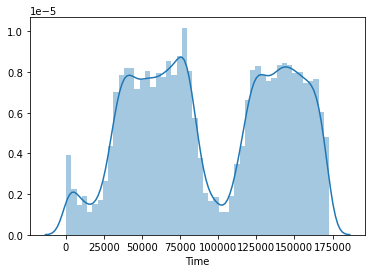

In [64]:
sns.distplot(df['Time'])

Fraudulent transactions: 0.17%

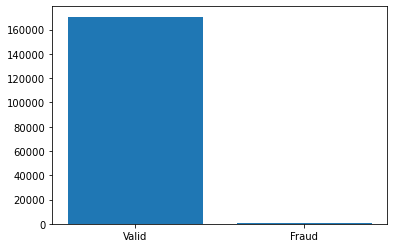

In [67]:
plt.bar(['Valid','Fraud'],list(df['Class'].value_counts()))
print("Fraudulent transactions: ", end='')
frauds= df['Class'].value_counts()[1]/sum(df['Class'].value_counts())
print(round(frauds*100,2), end='%')
plt.show()

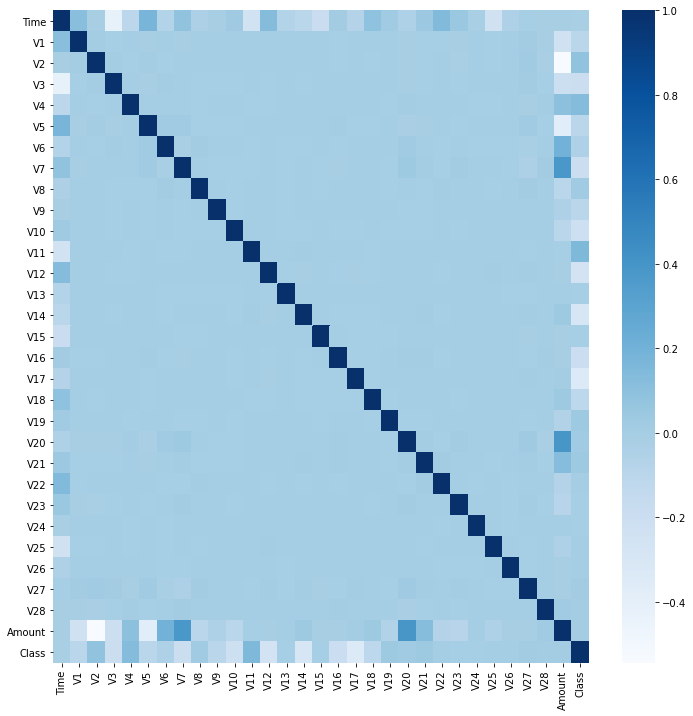

In [68]:
fig=plt.figure(figsize= (12, 12)) 
sns.heatmap(df.corr(), cmap='Blues')
plt.show()

In [69]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246861,153360.0,1.859069,0.495529,-0.915797,3.844771,0.424945,-0.500430,0.502319,-0.209547,-0.997294,...,-0.129304,-0.478057,0.204805,-0.052519,-0.078107,-0.178719,-0.064061,-0.045157,49.52,0
40432,40236.0,1.287681,0.047642,-0.139635,0.124643,0.196729,0.086360,-0.073706,0.018454,-0.062444,...,-0.115033,-0.381751,-0.174287,-1.003813,0.504604,0.457985,-0.049665,-0.008178,19.99,0
92940,64179.0,1.019689,-0.519145,1.222319,1.343446,-0.387528,2.113138,-1.085252,0.603805,1.325123,...,-0.037295,0.380267,-0.300607,-1.260574,0.666439,-0.136967,0.120950,0.021560,50.90,0
37006,38766.0,0.632528,-0.633902,0.070468,1.288740,-0.642414,-0.668893,0.464315,-0.143461,-0.244144,...,0.260270,0.081667,-0.332659,0.548154,0.506982,-0.387301,-0.047492,0.061053,291.21,0
97823,66400.0,-0.608518,0.874648,1.503943,1.048722,0.598558,0.349904,0.541028,0.253418,-0.839199,...,0.075171,0.268668,-0.420611,-0.318508,0.522833,-0.043070,0.077224,0.053378,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57279,47840.0,-0.805266,1.259666,0.670128,0.887574,-0.542419,0.049243,1.054851,0.209013,-0.936870,...,0.243523,0.686569,0.021390,0.116238,-0.266602,-0.315811,-0.003971,0.060638,154.00,0
227991,145312.0,2.223157,-1.519990,-0.596734,-1.412781,-1.681958,-0.927934,-1.232619,-0.205269,-0.969575,...,-0.131447,0.073870,0.242197,0.015886,-0.309904,-0.180257,0.018650,-0.040411,43.20,0
157050,109405.0,-0.490580,0.782371,2.392803,-0.100468,0.045722,-0.381089,0.482379,-0.233984,1.628376,...,-0.317674,-0.493696,-0.295007,-0.077560,0.238158,-0.727952,-0.084550,-0.147273,2.12,0
26178,33942.0,-2.514546,0.415560,1.008660,-0.917082,0.751552,1.043261,-0.418299,0.798395,-0.367902,...,0.082480,0.329844,-0.627938,-0.910312,-0.378112,0.987598,-1.001041,-0.783595,7.81,0


In [101]:
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264202,161316.0,-1.834646,0.836599,-1.777191,-1.385531,1.217880,-0.488019,2.335031,-0.814653,0.405667,...,-0.087070,0.901651,-0.275935,0.288873,-0.090961,0.031079,0.195364,0.457551,183.33,0
105124,69375.0,1.042229,0.083601,0.583103,1.555536,-0.452934,-0.476420,0.140344,-0.063641,0.246198,...,-0.039824,0.021326,-0.035754,0.617351,0.576386,-0.349961,0.032509,0.029006,52.32,0
229013,145763.0,1.721193,-1.311794,-1.470353,-0.077137,-0.812410,-1.073990,0.057263,-0.445284,-0.336708,...,0.088584,0.419382,-0.187119,0.002360,0.146408,-0.042491,-0.029985,-0.013237,239.00,0
257801,158350.0,2.047257,-0.369756,-2.544861,-0.727895,2.386680,3.318663,-0.476749,0.791092,0.403162,...,-0.292272,-0.835752,0.380154,0.698272,-0.265459,0.219083,-0.052471,-0.066627,2.69,0
33324,37188.0,-1.070387,1.065981,1.504558,-0.472659,0.462120,-1.179402,0.897777,-0.385507,0.039110,...,-0.275099,-0.696605,-0.156976,0.325944,-0.247548,-0.116075,-0.247414,-0.030272,1.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282154,170694.0,-1.198514,0.067978,3.017730,0.597971,-0.546726,1.444752,-0.364192,0.534390,1.366915,...,0.103904,0.697841,-0.476280,0.696894,0.697950,-0.389474,0.077107,0.065465,78.00,0
162231,114948.0,-1.185746,-0.314481,1.175712,-3.086775,-0.937127,-0.098773,-0.395241,0.524620,-2.521438,...,-0.062146,0.025225,-0.227184,-0.481106,0.737622,-0.112099,0.137225,0.013963,78.00,0
34626,37758.0,1.160467,0.047953,0.560250,0.517375,-0.471830,-0.351722,-0.220201,0.154796,0.001032,...,-0.182960,-0.605675,0.198064,0.176676,0.035489,0.099441,-0.026025,0.004033,0.89,0
247403,153564.0,-0.376374,1.009306,-0.399056,1.322343,0.149617,-1.050941,0.371437,0.172245,-0.660490,...,0.385474,1.015331,-0.184251,-0.029068,-0.314449,0.289551,0.103910,0.104955,42.46,0


In [102]:
validation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64157,51054.0,1.047956,-0.030360,0.513246,1.171869,-0.296456,-0.003259,-0.001054,0.022504,0.121466,...,-0.176247,-0.474964,-0.092705,0.021229,0.536514,-0.533206,0.026714,0.026983,73.84,0
60590,49393.0,-1.080903,1.154593,0.624921,-0.681739,0.363252,-0.848685,0.789634,0.371433,-1.072527,...,-0.225142,-0.882660,0.047711,-0.003425,-0.157240,-0.025518,0.140639,0.077406,29.95,0
38284,39325.0,-0.633186,1.475551,0.290783,0.948918,0.421152,-0.597373,0.354012,0.422166,-1.123047,...,0.157907,0.333432,-0.207025,-0.104833,-0.221397,-0.329886,0.066329,0.101782,1.00,0
122932,76747.0,-5.717655,2.834716,-2.011053,-0.928978,-2.543199,-2.106962,-2.257991,3.009203,0.336108,...,-0.378153,-0.164442,1.308712,0.766918,0.515665,0.796994,0.159101,-0.538374,0.46,0
159245,112378.0,2.073727,-0.122667,-1.488640,0.181151,0.138248,-0.849911,0.069656,-0.199483,0.931940,...,0.254700,0.831063,0.030798,0.664846,0.301294,-0.443211,-0.001013,-0.050312,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207090,136514.0,-3.953999,3.317581,-1.151384,-1.505065,-1.063621,-0.526652,-0.606265,1.043722,2.593934,...,-0.373576,-0.901447,0.158524,-0.636012,0.158934,-0.343562,-0.479012,0.035148,1.16,0
51491,44974.0,1.296191,0.231265,0.160401,0.428344,-0.031881,-0.494893,0.099831,-0.188251,0.012680,...,-0.298466,-0.857455,0.015073,-0.444162,0.344625,0.143337,-0.028645,0.013893,13.99,0
256646,157793.0,-0.941076,1.286330,-1.076873,-1.390461,1.430611,-1.230539,1.734071,-0.542389,0.212249,...,0.089003,0.964125,-0.120436,-0.427629,-0.137407,0.086679,0.494365,0.163389,2.99,0
34807,37834.0,0.187318,-1.492854,0.412392,1.399396,-0.889459,0.635737,0.059617,0.181541,0.087719,...,0.366855,-0.024222,-0.419188,-0.297096,0.085607,-0.452012,-0.025415,0.106137,490.00,0


# Classification:
1. Train a logistic regression model on the training set partition by taking all the features. Calculate the 
error on the validation set.

In [70]:
model = LogisticRegression()

In [71]:
model.fit(train.drop('Class',axis=1),train['Class'])

/Users/meghakhangarot/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
predictions = model.predict(test.drop('Class',axis=1))

In [74]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(test['Class'], predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.74      0.65      0.69       107

    accuracy                           1.00     56962
   macro avg       0.87      0.83      0.85     56962
weighted avg       1.00      1.00      1.00     56962



2. Train a neural network model (MLPClassifier) by taking all the features and predicting the result. Fix 
the random_state for training. Choose the solver as ‘adam’, and set the number of hidden layers to (10, 
2). Vary the hidden layers to find the best set of results on validation set. Explore different training 
parameters of MLP.

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
classifier = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=100,activation = 'relu',solver='adam',random_state=42)

In [79]:
X_train=train.drop('Class',axis=1)

In [80]:
Y_train=train['Class']

In [81]:
classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=100, random_state=42)

In [82]:
X_val=validation.drop('Class',axis=1)
y_val=validation['Class']
y_pred = classifier.predict(X_val)

In [83]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

## 3. Find the evaluation scores by constructing the confusion matrix (True Positive, False positive, True
Negative and False Negatives). Precision = TP/(TP+FP), Recall = TP/(TP+FN)


In [122]:
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
confusion_m = confusion_matrix(y_val,y_pred)
print("Accuracy of MLPClassifier : ''", accuracy(confusion_m))

Accuracy of MLPClassifier : '' 0.9982444333908769


In [123]:
confusion_m

array([[34110,     2],
       [   58,     7]])

In [124]:
precision=(confusion_m[0][0])/(confusion_m[0][0]+confusion_m[0][1])
recall=(confusion_m[0][0])/(confusion_m[0][0]+confusion_m[1][0])

In [125]:
print("Precision: ",precision)
print("Recall: ",recall)

Precision:  0.9999413696060038
Recall:  0.9983025052680871


### 4. Plot the precision and recall values on the same plot for different training iterations for the MLP model by varying max_iter as 25, 50, 75, …. 

In [126]:
classifier = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=25,activation = 'relu',solver='adam',random_state=42)

In [127]:
X_train=train.drop('Class',axis=1)
Y_train=train['Class']
X_val=validation.drop('Class',axis=1)
y_val=validation['Class']

In [128]:
classifier.fit(X_train, Y_train)

/Users/meghakhangarot/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=25, random_state=42)

In [129]:
y_pred = classifier.predict(X_val)
confusion_m_25 = confusion_matrix(y_val,y_pred)
print(confusion_m_25)

[[34112     0]
 [   65     0]]


In [130]:
precision_25=(confusion_m[0][0])/(confusion_m[0][0]+confusion_m[0][1])
recall_25=(confusion_m[0][0])/(confusion_m[0][0]+confusion_m[1][0])
print("Precision: ",precision_25)
print("Recall: ",recall_25)

Precision:  0.9999413696060038
Recall:  0.9983025052680871


In [135]:
classifier = MLPClassifier(hidden_layer_sizes=(30,5), max_iter=700,activation = 'relu',solver='adam',random_state=42)

In [132]:
classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(30, 5), max_iter=500, random_state=42)

In [133]:
y_pred = classifier.predict(X_val)
confusion_m_50 = confusion_matrix(y_val, y_pred)
print(confusion_m_50)

[[34110     2]
 [   58     7]]
